In [1]:
import pybamm as pb;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
import scipy.optimize
import random;import time, signal


In [14]:
fs=17;
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [6]:
# Reload all scans in this round! 
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P2R7/P2_int_221205/'; 
# Initialize the big dict:
Targets = [
    "Int_1_scan_Dint","Int_2_scan_k_LiP","Int_3_scan_pLAM_Neg",
    "Int_4_scan_pLAM_Pos","Int_5_scan_Crack_Neg",
    "Int_6_scan_Crack_Pos",]
Scan_Num = [3,4,4,4,3,3]
Round_P2_int_221205 = {}
for target,scan_num in zip(Targets,Scan_Num):
    Round_P2_int_221205[target] = {}
    Scans = np.arange(1,scan_num+1,1).tolist()
    for scan in Scans:
        Round_P2_int_221205[target][str(scan)]={}
        try:
            Round_P2_int_221205[target][str(scan)] = loadmat( 
            BasicPath  +   target+ "/" + str(scan) + "/" 
            + str(scan)+ "-StructDara_for_Mat.mat")
        except:
            print(f"Nothing in {target}, Scan {scan}")

In [36]:
def Plot_CycRPT_Scans(Round,target,Scans,Labels,BasicPath,fs,  dpi,Save):
    font = {'family' : 'DejaVu Sans','size': fs}
    mpl.rc('font', **font)
    fig, axs = plt.subplots(2,2, figsize=(11,8.5),tight_layout=True)
    for scan,label in zip(Scans,Labels):
        axs[0,0].plot(
            Round[target][str(scan)]["Cycle_RPT"][0],
            Round[target][str(scan)]["Discharge capacity [A.h]"][0],
            '-^',  label=label)
        axs[0,1].plot(
            Round[target][str(scan)]["Cycle_RPT"][0],
            Round[target][str(scan)]["CDend Loss of capacity to lithium plating [A.h]"][0]
            +Round[target][str(scan)]["CDend Loss of capacity to SEI [A.h]"][0]
            +Round[target][str(scan)]["CDend Loss of capacity to SEI on cracks [A.h]"][0],
            '-^',  label=label)
        axs[1,0].plot(
            Round[target][str(scan)]["Cycle_RPT"][0],
            Round[target][str(scan)]["CDend Negative electrode capacity [A.h]"][0][0]
            -Round[target][str(scan)]["CDend Negative electrode capacity [A.h]"][0],
            '-^',  label=label)
        axs[1,1].plot(
            Round[target][str(scan)]["Cycle_RPT"][0],
            Round[target][str(scan)]["CDend Positive electrode capacity [A.h]"][0][0]
            -Round[target][str(scan)]["CDend Positive electrode capacity [A.h]"][0],
            '-^',  label=label)
        axs[0,0].set_title("Discharge capacity",   fontdict={'family':'DejaVu Sans','size':fs+1})
        axs[0,1].set_title("LLI",   fontdict={'family':'DejaVu Sans','size':fs+1})
        axs[1,0].set_title("LAM Neg",   fontdict={'family':'DejaVu Sans','size':fs+1})
        axs[1,1].set_title("LAM Pos",   fontdict={'family':'DejaVu Sans','size':fs+1})
        for i in range(0,2):
            for j in range(0,2):
                axs[i,j].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
                axs[i,j].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
                axs[i,j].tick_params(labelcolor='k', labelsize=fs, width=1)
                axs[i,j].ticklabel_format( 
                    axis='y', style='sci',
                    scilimits=[0,1e-5], useOffset=None, 
                    useLocale=None, useMathText=None)
        axs[1,1].legend(prop={'family':'DejaVu Sans','size':fs-4},loc='best',frameon=False)
    if Save == True:
        plt.savefig(BasicPath + target+ "/" +  target+ "Cap_DMA.png", dpi=dpi)

In [ ]:
Scans = np.arange(1,scan_num+1,1).tolist() # can be a self-defined list
Labels = ["Dint=1E-22","Dint=1E-19","Dint=1E-18",]
target = "Int_1_scan_Dint"
Plot_CycRPT_Scans(Round_P2_int_221205,target,Scans,Labels,BasicPath,17,  200,Save=True)

In [3]:
Scans = np.arange(1,4+1,1).tolist() # can be a self-defined list
Labels = ["k_LiP=1E-12","k_LiP=1E-10","k_LiP=1E-9","k_LiP=1E-8",]
target = "Int_2_scan_k_LiP"
Plot_CycRPT_Scans(Round_P2_int_221205,target,Scans,Labels,BasicPath,17,  200,Save=True)

dict

In [ ]:
Scans = np.arange(1,4+1,1).tolist() # can be a self-defined list
Labels = ["Prop LAM Neg=2.78e-10","Prop LAM Neg=2.78e-8","Prop LAM Neg=2.78e-7","Prop LAM Neg=2.78e-6",]
target = "Int_3_scan_pLAM_Neg"
Plot_CycRPT_Scans(Round_P2_int_221205,target,Scans,Labels,BasicPath,17,  200,Save=True)

In [ ]:
Scans = np.arange(1,4+1,1).tolist() # can be a self-defined list
Labels = ["Prop LAM Pos=2.78e-10","Prop LAM Pos=2.78e-8","Prop LAM Pos=2.78e-7","Prop LAM Pos=2.78e-6",]
target = "Int_4_scan_pLAM_Pos"
Plot_CycRPT_Scans(Round_P2_int_221205,target,Scans,Labels,BasicPath,17,  200,Save=True)

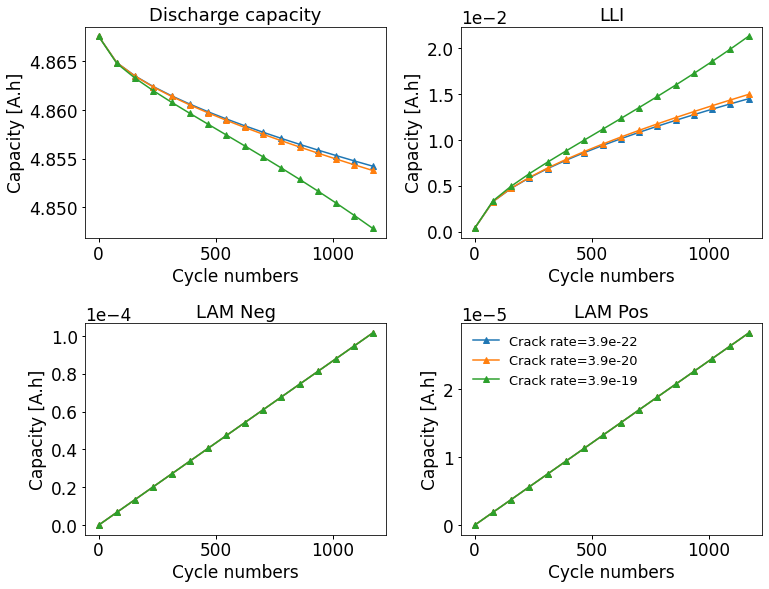

In [39]:
Scans = np.arange(1,3+1,1).tolist() # can be a self-defined list
Labels = ["Crack rate=3.9e-22","Crack rate=3.9e-20","Crack rate=3.9e-19"]
target = "Int_5_scan_Crack_Neg"
Plot_CycRPT_Scans(Round_P2_int_221205,target,Scans,Labels,BasicPath,17,  200,Save=True)

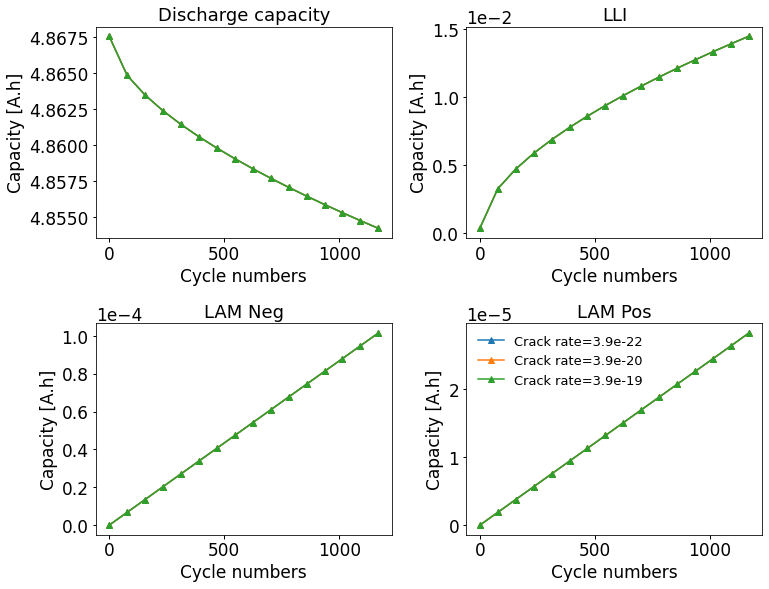

In [40]:
Scans = np.arange(1,3+1,1).tolist() # can be a self-defined list
Labels = ["Crack rate=3.9e-22","Crack rate=3.9e-20","Crack rate=3.9e-19"]
target = "Int_6_scan_Crack_Pos"
Plot_CycRPT_Scans(Round_P2_int_221205,target,Scans,Labels,BasicPath,17,  200,Save=True)